In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/Colab Notebooks/Deep Learning Projects/Fire Detection

/content/drive/MyDrive/Colab Notebooks/Deep Learning Projects/Fire Detection


In [3]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [4]:
import matplotlib.pyplot as plt

In [5]:
!pip install split-folders

In [6]:
cd /content/drive/MyDrive/Colab Notebooks/DeepLearning Datasets Jan 31 2022/Fire Detection/

/content/drive/MyDrive/Colab Notebooks/DeepLearning Datasets Jan 31 2022/Fire Detection


In [7]:
import splitfolders
splitfolders.ratio('fire_dataset', output="output", seed=1337, ratio=(.8, 0.1,0.1))

Copying files: 999 files [04:22,  3.81 files/s]


In [8]:
cd /content/drive/MyDrive/Colab Notebooks/Deep Learning Projects/Fire Detection

/content/drive/MyDrive/Colab Notebooks/Deep Learning Projects/Fire Detection


In [9]:
training_path = r'/content/drive/MyDrive/Colab Notebooks/DeepLearning Datasets Jan 31 2022/Fire Detection/output/train'
validation_path = r'/content/drive/MyDrive/Colab Notebooks/DeepLearning Datasets Jan 31 2022/Fire Detection/output/val'
test_path = r'/content/drive/MyDrive/Colab Notebooks/DeepLearning Datasets Jan 31 2022/Fire Detection/output/test'

In [10]:
train_datagen = ImageDataGenerator(rescale = 1/255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale = 1/255)
test_datagen = ImageDataGenerator(rescale = 1/255)

In [11]:
training_set = train_datagen.flow_from_directory(training_path, target_size=(64,64), batch_size = 80, class_mode='binary')
val_set = val_datagen.flow_from_directory(validation_path, target_size=(64,64), batch_size=99, class_mode='binary')
test_set = test_datagen.flow_from_directory(test_path, target_size=(64,64), batch_size = 100, class_mode='binary')

Found 799 images belonging to 2 classes.
Found 99 images belonging to 2 classes.
Found 101 images belonging to 2 classes.


In [12]:
training_data = next(training_set)

In [13]:
training_data[0].shape

(80, 64, 64, 3)

In [14]:
test_set[0][0].shape

(100, 64, 64, 3)

In [15]:
val_set[0][0].shape

(99, 64, 64, 3)

In [16]:
training_set.class_indices

{'fire_images': 0, 'non_fire_images': 1}

Fire


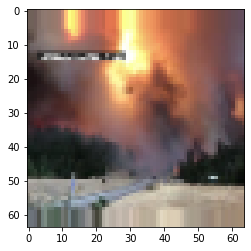

In [17]:
classes = ['Fire', 'No Fire']
plt.imshow(training_data[0][61])

a = training_data[1][61]

print(classes[int(a)])

In [18]:
classifier = Sequential()

classifier.add(Conv2D(32,3,activation = 'relu', input_shape=(64,64,3)))
classifier.add(MaxPool2D())

classifier.add(Conv2D(64,3,activation = 'relu', input_shape=(64,64,3)))
classifier.add(MaxPool2D())

classifier.add(Conv2D(128,3,activation = 'relu', input_shape=(64,64,3)))
classifier.add(MaxPool2D())

classifier.add(Conv2D(256,3,activation = 'relu', input_shape=(64,64,3)))
classifier.add(MaxPool2D())


classifier.add(Flatten())

classifier.add(Dense(256, activation = 'relu'))
classifier.add(Dense(128, activation = 'relu'))

classifier.add(Dense(64, activation = 'relu'))

classifier.add(Dense(32, activation = 'relu'))

classifier.add(Dense(1, activation = 'sigmoid'))

In [19]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history = classifier.fit(training_set, epochs = 10, validation_data=test_set)

Epoch 1/10
10/10 [==============================] - 48s 4s/step - loss: 0.6076 - accuracy: 0.7109 - val_loss: 0.5267 - val_accuracy: 0.7525
Epoch 2/10
10/10 [==============================] - 35s 3s/step - loss: 0.4141 - accuracy: 0.7559 - val_loss: 0.3113 - val_accuracy: 0.7525
Epoch 3/10
10/10 [==============================] - 37s 4s/step - loss: 0.2911 - accuracy: 0.8411 - val_loss: 0.3338 - val_accuracy: 0.8119
Epoch 4/10
10/10 [==============================] - 35s 4s/step - loss: 0.2738 - accuracy: 0.9036 - val_loss: 0.3708 - val_accuracy: 0.8119
Epoch 5/10
10/10 [==============================] - 35s 3s/step - loss: 0.2208 - accuracy: 0.9111 - val_loss: 0.1844 - val_accuracy: 0.9505
Epoch 6/10
10/10 [==============================] - 36s 4s/step - loss: 0.1469 - accuracy: 0.9462 - val_loss: 0.0634 - val_accuracy: 0.9802
Epoch 7/10
10/10 [==============================] - 35s 3s/step - loss: 0.1608 - accuracy: 0.9424 - val_loss: 0.2556 - val_accuracy: 0.9307
Epoch 8/10
10/10 [==

In [20]:
Y_pred_test = classifier.predict(val_set)
Y_pred_test.shape

(99, 1)

In [21]:
print(Y_pred_test)

[[9.97524440e-01]
 [1.26379728e-03]
 [1.66088343e-04]
 [4.73330829e-06]
 [5.53835707e-05]
 [7.32392073e-04]
 [1.39436861e-05]
 [1.69456507e-05]
 [6.60651722e-06]
 [9.76118445e-01]
 [9.99853492e-01]
 [2.11715698e-04]
 [2.18808651e-04]
 [4.37261515e-05]
 [3.06680799e-03]
 [3.96106843e-05]
 [9.99918103e-01]
 [2.24948162e-05]
 [9.97305274e-01]
 [9.50723886e-04]
 [9.98519421e-01]
 [3.30488147e-05]
 [4.65679987e-05]
 [1.31663796e-06]
 [8.69613528e-01]
 [6.06542826e-03]
 [9.96938586e-01]
 [1.03241205e-03]
 [1.86698380e-05]
 [5.55008650e-04]
 [3.79770790e-05]
 [3.17354079e-06]
 [1.94242597e-03]
 [9.99906301e-01]
 [2.76486412e-06]
 [6.35282099e-02]
 [9.97972488e-01]
 [9.13296681e-05]
 [6.31826467e-08]
 [9.87437963e-02]
 [3.09008360e-03]
 [2.14190222e-05]
 [7.97118783e-01]
 [5.62000275e-03]
 [1.85155869e-03]
 [2.55786034e-07]
 [9.87185717e-01]
 [4.65178418e-05]
 [4.13495302e-03]
 [9.99933839e-01]
 [7.80768823e-06]
 [3.28972164e-05]
 [3.76248360e-03]
 [1.44863725e-02]
 [1.53455380e-06]
 [5.358755

'Fire'

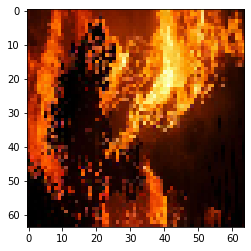

In [22]:
plt.imshow(val_set[0][0][35])
classes[int(val_set[0][1][35])]

In [23]:
print(val_set[0][1][13])
print(Y_pred_test.round()[13])

1.0
[0.]


In [24]:
print(Y_pred_test[35])

[0.06352821]


In [25]:
print(Y_pred_test.shape)

(99, 1)


In [26]:
print(f'Accuracy is : {accuracy_score(val_set[0][1], Y_pred_test.round())}')
print(f'F1 Score is : {f1_score(val_set[0][1], Y_pred_test.round(), average = "weighted")}.')
print(f'Precision is : {precision_score(val_set[0][1], Y_pred_test.round(), average="weighted")}.')
print(f'Recall is : {recall_score(val_set[0][1], Y_pred_test.round(), average = "weighted")}.')


Accuracy is : 0.6666666666666666
F1 Score is : 0.6642243201352683.
Precision is : 0.6618993135011442.
Recall is : 0.6666666666666666.


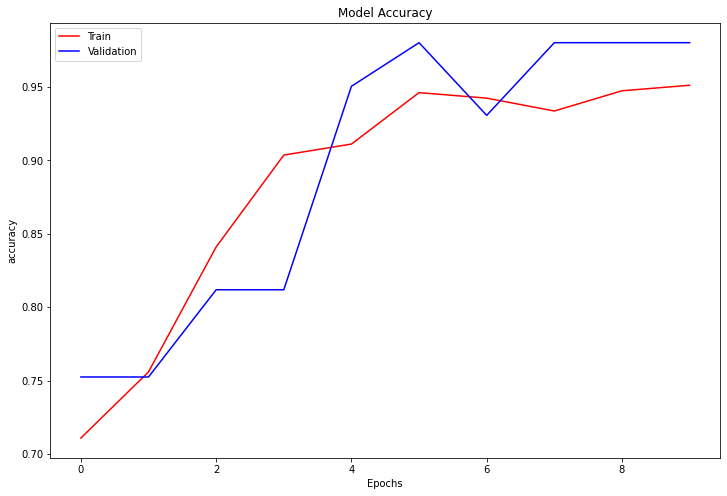

In [27]:
plt.figure(figsize = (12,8))
plt.plot(history.history['accuracy'], color = 'red', label = 'Train')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'Validation')
plt.ylabel('accuracy')
plt.xlabel('Epochs')
plt.title('Model Accuracy')
plt.legend()
plt.show()

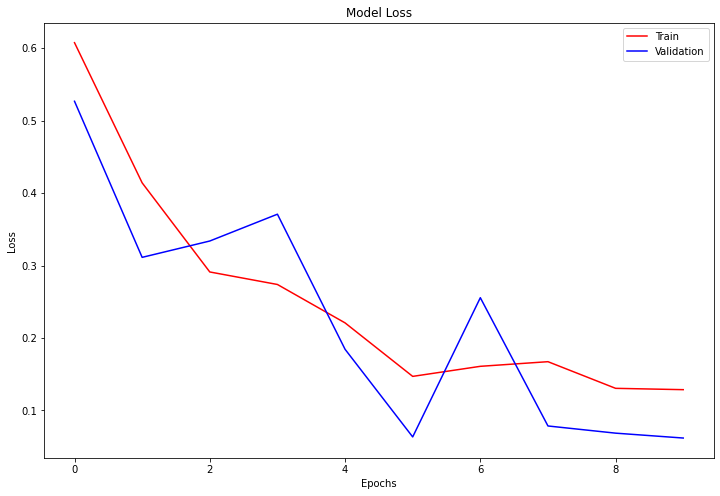

In [28]:
plt.figure(figsize = (12,8))
plt.plot(history.history['loss'], color = 'red', label = 'Train')
plt.plot(history.history['val_loss'], color = 'blue', label = 'Validation')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Model Loss')
plt.legend()
plt.show()

In [29]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [30]:
conf_mat = confusion_matrix(val_set[0][1], Y_pred_test.round())
print(conf_mat)

[[59 16]
 [17  7]]


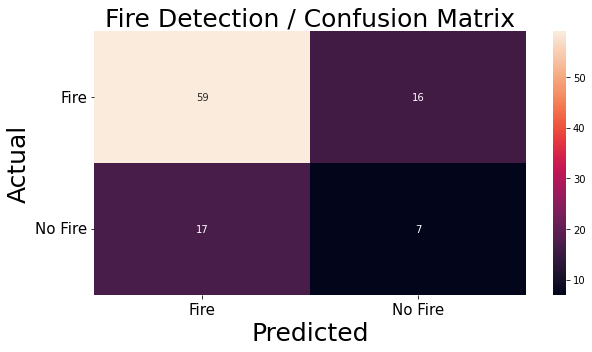

In [31]:
import seaborn as sns

plt.figure(figsize = (9,5))
colormap = sns.color_palette('Blues', 12)
sns.heatmap(conf_mat, annot = True, fmt = 'g')
posx, text_valx = plt.xticks()
posy, text_valy = plt.yticks()




plt.xticks(posx, ['Fire', 'No Fire'], fontsize = 15)
plt.yticks(posy, ['Fire', 'No Fire'], fontsize = 15, rotation = 0, va ='center')
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Actual', fontsize = 25)
plt.title('Fire Detection / Confusion Matrix', fontsize = 25)

plt.tight_layout()
plt.show()

In [32]:
classifier.save(r'/content/drive/MyDrive/Colab Notebooks/Deep Learning Projects/Fire Detection/fire_detection_98.h5')

In [33]:
from keras.models import load_model

model = load_model('/content/drive/MyDrive/Colab Notebooks/Deep Learning Projects/Fire Detection/fire_detection_98.h5')

# # read the image
test_image = image.load_img('/content/drive/MyDrive/Colab Notebooks/Deep Learning Projects/Fire Detection/Images from Web/1Fire.jpg',
                            target_size=(64,64))

# # image to array
test_image = image.img_to_array(test_image)
test_image = image.smart_resize(test_image, (64,64))

test_image = test_image.reshape(1,64,64,3)

result = model.predict(test_image).argmax(axis=1)

print(classes[result[0]])



Fire
